In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def getSequences():
    print("enter first sequence")
    seq1 = input()
    print("enter second sequence")
    seq2 = input()
    return seq1, seq2

In [3]:
def getAlignment(seq1, seq2, windowSize, threshold, step):
    result = np.zeros([len(seq1),len(seq2)], dtype=int)
    i = 0
#     initial window position for seq1
    window1 = seq1[:windowSize]
    while(i<len(seq2)- windowSize +1):
        window2 = seq2[i:windowSize + i]
        matching = 0;
        j =0
        while(j<len(seq1) - windowSize +1):
#             use list to get the letters of each window
            windowSeq1 = list(window1)
            windowSeq2 = list(window2)
            index = 0
            matching=0
#             compare the 2 widows' nucleotides
            for nuc in windowSeq1:
                    if nuc == windowSeq2[index]:
                        matching += 1
                    index+=1
            if matching >= threshold:
#                 position the dot in the middle of both windows
                result[i+math.ceil(windowSize/2)][j+math.ceil(windowSize/2)] = 1
            j+=step
#             update window1 
            if(j<len(seq1) - windowSize +1):
                window1 = seq1[j:windowSize + j]
            else: window1 = seq1[:windowSize]
#         increment the window position according to the step size
        i+=step
    return result

In [4]:
def plotMatrix(matrix,seq1,seq2):
    cellColors = np.zeros([len(seq1),len(seq2)],dtype=str)
#     color the cell depending on its value
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if matrix[i][j] == 1:
                cellColors[i][j] = 0
            else:
                cellColors[i][j] = 1
#     construct the plot
    fig, ax =plt.subplots(1,1)
    columns=seq1
    rows=seq2
    ax.axis('off')
    rcolors = plt.cm.BuPu(np.full(len(seq1), 0.8))
    ccolors = plt.cm.BuPu(np.full(len(seq2), 0.8))
    ax.table(cellText=matrix,colLabels=columns,rowLabels=rows,rowColours=rcolors,colColours=ccolors,cellColours=cellColors,loc="center")
    plt.show()

enter first sequence
CCATCGCCATCG
enter second sequence
GCATCGGCTACG


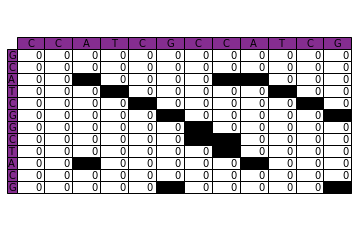

In [8]:
seq1, seq2 = getSequences()
# window size=3 threshold=2, step=1
result = getAlignment(seq1, seq2, 3, 2, 1)
plotMatrix(result,list(seq1),list(seq2))